__Try to slove as many as possible. Questions are not mandetory but has some weights associated with each.__

### `MarketLevelData` has 10 variables and 104 weeks execusion data points stored in a pandas dataframe. 

In [0]:
import numpy as np
import pandas as pd
n_tactic = 10
n_weeks = 104
col_names = ['TV1','RADIO_FM','TV2','TV3','RADIO_AM','TV4','ONLINE','YT1',
             'YT1','FB']
causals = np.random.normal(loc=200, scale = 800, size=(n_weeks,n_tactic))
causals = np.where(causals>0, causals, 0)
MarketLevelData = pd.DataFrame(causals, columns=col_names)
rr = pd.Series(np.random.uniform(.1,.6,size = n_tactic),
               index = col_names,
               name = 'rr')

In [0]:
MarketLevelData.head()

,TV1,RADIO_FM,TV2,TV3,RADIO_AM,TV4,ONLINE,YT1,YT1,FB
0,1053.122848,0.000000,329.576086,0.000000,113.098173,0.000000,2034.098917,1294.757531,0.000000,283.300220
1,336.227331,566.208803,954.397981,804.045678,0.000000,136.426105,0.000000,324.851683,0.000000,209.418397
2,0.000000,0.000000,0.000000,349.568534,798.428998,0.000000,1182.038007,0.000000,1568.723491,1356.302094
3,814.390391,172.550008,65.864180,789.256839,320.698737,362.934967,0.000000,0.000000,0.000000,0.000000
4,0.000000,441.195976,126.096082,0.000000,0.000000,1456.226738,723.698087,0.000000,1039.014009,484.075199


In [0]:
rr

TV1         0.299018
RADIO_FM    0.257095
TV2         0.574976
TV3         0.284621
RADIO_AM    0.146438
TV4         0.460893
ONLINE      0.265066
YT1         0.335013
YT1         0.584584
FB          0.413170
Name: rr, dtype: float64

### Perform the foumula mentioned bellow by considering the `MarketLevelData` dataframe and `rr` vecctor:

$$AS_{i,j} = AS_{i,j-1} + (rr_{i} \times Var_{i,j}), i = 1(1)10, j = 1(1)104$$

Here Var represents the columns of dataframe `MarketLevelData`. AS is the elements of the new dataframe. Write a function which will impliment the following formula in `MarketLevelData` dataframe. 

1. Can you write a function using for loop which will compute this function in parallel? Is it possible to make it JIT compitable? If yes, then how? 
2. Write a pure numpy implimentation of the above mentioned formula and define a function. Use broadcasting and Matrix multiplication if there is a scope. 
3. Is it possible to scale-in and scale-out the above mentioned function? If yes, the what library will you use to perform the task. 
4. In each of the above mentioned cases include try catch to handel error and display relevant message. Warnings, messages should be converted to more meaningful logs.
5. Include comment, doc string, stactic typing to make the code readable and reproducable. 
6. While writing this function take runtime into consideration. Profile and compare 3 functions and demonstrate how can improve the run time effeciency of the functions.
7. Write few unit test cases for above mentioned function. What other testing could be considered to make the functions robust?
8. Is there any function avaiable in other libraries which can perform this task without writing the function from stractch. 




####__Expected format of function definition:__

```python

def q1_calculation_for_loop(fargs, *args, **kwargs):
  """
  Do something.
  """
  return result
```

In [0]:
as_df = pd.DataFrame()

In [0]:
first_iter = True
for i in range(1,n_tactic+1):
  for j in range(1,n_weeks+1):
    if first_iter = True:
      as_df[i,j] = rr[i] * MarketLevelData.values[i,j]
      
  

### After running the cell below there will be a `salesdata` loaded in memory. Perform the following tasks in order:

9.  NA and outlier imputation. 
10.  Non zero sales and count for each store. 
11.  Tally total sales and count at a store and date level. 
12.   Dates for each store with minimum and maximum sales.
13.   There can be multiple same date variable present for each store. Make sure after processing each date appear only once for each store.
14.   Date colum ranges between 2018/01/01 to 2018/01/07. Make sure that all these dates are present for each store. Do the required padding/filling for other
15.   columns while performing this operation. Sales and count can be aggregated by addition. 
16.   Change date format to 'dd-mm-yyyy'.
17.   Create a new string column in the same dataframe named 'Day' and map days of week corresponding to each date in the datafreame. 
18.  While performing the task take runtime, memory consumption into consideration. Demonstrate all the best practise to write, maintain and develop readable and reproducable code.

In [96]:
url='https://raw.githubusercontent.com/pandalearnstocode/csvfiles/master/salesdata.csv'
salesdata=pd.read_csv(url)
# dataframe = salesdata.copy()
salesdata.head()


,STORES,DATES,SALES,COUNT
0,STORE110,2018-01-01,624.0,10.0
1,STORE110,2018-01-03,271.0,3.0
2,STORE110,2018-01-05,5589.0,9.0
3,STORE110,2018-01-06,5541.0,10.0
4,STORE110,2018-01-07,40.0,6.0


In [97]:
salesdata['DATES'].max(),salesdata['DATES'].min()

('2018-01-07', '2018-01-01')

###**9) NA and Outlier Imputation**


In [0]:
#Method to find missing values for entire dataframe

def missing_values_table(df):
	mis_val = df.isnull().sum()
	mis_val_percent = 100 * df.isnull().sum() / len(df)
	mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
	mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
	mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(2)
	print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
	return mis_val_table_ren_columns

missing_values_table(salesdata)

In [0]:
# Imputing missing SALES and COUNT columns using Mean

salesdata['SALES'] = np.where(salesdata['SALES'].isnull(), np.mean(salesdata['SALES']), salesdata['SALES'])
salesdata['COUNT'] = np.where(salesdata['COUNT'].isnull(), int(np.mean(salesdata['COUNT'])), salesdata['COUNT'])

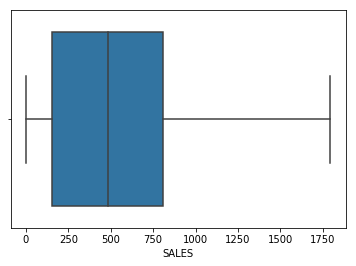

In [117]:
# Finding Outliers using BOX Plot

import seaborn as sns
sns.boxplot(x=salesdata['SALES'])

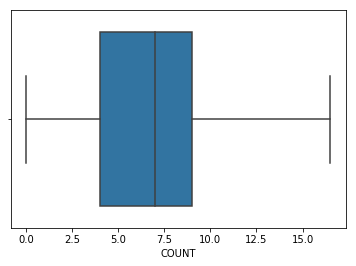

In [116]:
sns.boxplot(x=salesdata['COUNT'])

In [0]:
#detecting outlier using IQR
# returns the lower bound and upper bound and the values beyond these are outliers

def detect_outlier(data):
  col_data= data
  sorted(col_data)
  q1, q3= np.percentile(col_data,[25,75])
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr) 
  lower_bound = data.min() if lower_bound < data.min() else lower_bound
  upper_bound = data.max() if upper_bound > data.max() else upper_bound
  return lower_bound,upper_bound

In [0]:
sales_lower,sales_upper = detect_outlier(salesdata['SALES'])
count_lower,count_upper = detect_outlier(salesdata['COUNT'])

In [108]:
salesdata['SALES'][salesdata['SALES'] > sales_upper]

2     5589.0
3     5541.0
10    4400.0
43    6652.0
Name: SALES, dtype: float64

In [109]:
salesdata['SALES'][(salesdata['SALES'] < sales_lower)]

Series([], Name: SALES, dtype: float64)

In [0]:
# Imputing outlier for SALES Column by updating the values with more than upper bound with 3rd Quartile and value lower than lower bound with 1st Quartile

salesdata.loc[salesdata['SALES'] > sales_upper,'SALES'] = sales_upper

In [115]:
#detecting Outlier for 'COUNT' Column

salesdata['COUNT'][salesdata['COUNT'] > count_upper]

Series([], Name: COUNT, dtype: float64)

In [114]:
salesdata['COUNT'][salesdata['COUNT'] < count_lower]

Series([], Name: COUNT, dtype: float64)

In [0]:
#Imputing Outlier in 'COUNT' Column

salesdata.loc[salesdata['COUNT'] > count_upper,'COUNT'] = count_upper

### **10) Non Zero Sales and COUNT for each Store**

In [153]:
#Each Store SALES and COUNT
salesdata[(salesdata['SALES'] != 0) & (salesdata['COUNT'] != 0)].groupby(['STORES']).agg({"SALES":sum,"COUNT" : sum})

,SALES,COUNT
STORES,,
STORE110,4524.500000,38.0
STORE113,2174.000000,9.0
STORE114,3971.354167,25.0
STORE115,2993.000000,50.0
STORE127,1910.000000,38.5
STORE133,2710.000000,27.0
STORE136,1857.000000,38.5
STORE143,2178.000000,30.0
STORE149,3404.354167,33.5


###**11) Tally total sales and count at a store and date level.**

Tallying total sales and count by calculating cumsum for both store and date **levels**

In [0]:
salesdata.groupby(['STORES','DATES']).agg({"SALES":sum,"COUNT" : sum}).transform(pd.Series.cumsum)

SALES  COUNT
STORES   DATES                          
STORE110 2018-01-01    624.000000   10.0
         2018-01-03    895.000000   13.0
         2018-01-05   2689.750000   22.0
         2018-01-06   4484.500000   32.0
         2018-01-07   4524.500000   38.0
STORE113 2018-01-02   4524.500000   54.5
         2018-01-03   5336.500000   59.5
         2018-01-04   5800.500000   60.5
         2018-01-05   6698.500000   63.5
         2018-01-07   6698.500000   73.5
STORE114 2018-01-01   7055.500000   78.5
         2018-01-04   8025.500000   83.5
         2018-01-05   8875.104167   89.5
         2018-01-06   8875.104167   93.5
         2018-01-07  10669.854167  102.5
STORE115 2018-01-02  11473.854167  128.0
         2018-01-03  12053.854167  144.5
         2018-01-05  12476.854167  150.5
         2018-01-07  13662.854167  152.5
STORE127 2018-01-01  14450.854167  177.0
         2018-01-04  14630.854167  187.0
         2018-01-06  15148.854167  187.0
         2018-01-07  16090.854167  191.0
STORE133 2018-01-02  16789.854167  194.0
         2018-01-05  17809.854167  205.0
         2018-01-06  18800.854167  218.0
STORE136 2018-01-01  18948.854167  225.0
         2018-01-03  20147.854167  251.5
         2018-01-05  20657.854167  256.5
STORE143 2018-01-01  20732.854167  266.5
         2018-01-02  21690.854167  277.5
         2018-01-05  22118.854167  285.5
         2018-01-07  22835.854167  294.5
STORE149 2018-01-01  22835.854167  299.5
         2018-01-03  23685.458333  308.5
         2018-01-04  23962.458333  325.0
         2018-01-05  25757.208333  332.0
         2018-01-06  26240.208333  333.0
STORE196 2018-01-01  26649.208333  340.0
         2018-01-02  27307.208333  346.0
         2018-01-06  27307.208333  358.0
         2018-01-07  27477.208333  361.0

In [235]:
salesdata.groupby(['DATES','STORES']).agg({"SALES":sum,"COUNT" : sum}).transform(pd.Series.cumsum)

SALES  COUNT
DATES      STORES                       
2018-01-01 STORE110    624.000000   10.0
           STORE114    981.000000   15.0
           STORE127   1769.000000   39.5
           STORE136   1917.000000   46.5
           STORE143   1992.000000   56.5
           STORE149   1992.000000   61.5
           STORE196   2401.000000   68.5
2018-01-02 STORE113   2401.000000   85.0
           STORE115   3205.000000  110.5
           STORE133   3904.000000  113.5
           STORE143   4862.000000  124.5
           STORE196   5520.000000  130.5
2018-01-03 STORE110   5791.000000  133.5
           STORE113   6603.000000  138.5
           STORE115   7183.000000  155.0
           STORE136   8382.000000  181.5
           STORE149   9231.604167  190.5
2018-01-04 STORE113   9695.604167  191.5
           STORE114  10665.604167  196.5
           STORE127  10845.604167  206.5
           STORE149  11122.604167  223.0
2018-01-05 STORE110  12917.354167  232.0
           STORE113  13815.354167  235.0
           STORE114  14664.958333  241.0
           STORE115  15087.958333  247.0
           STORE133  16107.958333  258.0
           STORE136  16617.958333  263.0
           STORE143  17045.958333  271.0
           STORE149  18840.708333  278.0
2018-01-06 STORE110  20635.458333  288.0
           STORE114  20635.458333  292.0
           STORE127  21153.458333  292.0
           STORE133  22144.458333  305.0
           STORE149  22627.458333  306.0
           STORE196  22627.458333  318.0
2018-01-07 STORE110  22667.458333  324.0
           STORE113  22667.458333  334.0
           STORE114  24462.208333  343.0
           STORE115  25648.208333  345.0
           STORE127  26590.208333  349.0
           STORE143  27307.208333  358.0
           STORE196  27477.208333  361.0

### **12) Dates for each store with minimum and maximum sales.**

In [0]:
salesdata_grouped = salesdata.groupby(['STORES'],as_index=False).agg({"SALES":[min,max]})

In [179]:
salesdata_grouped

STORES  SALES         
               min      max
0  STORE110   40.0  1794.75
1  STORE113    0.0   898.00
2  STORE114    0.0  1794.75
3  STORE115  321.0  1186.00
4  STORE127   29.0   942.00
5  STORE133  114.0   906.00
6  STORE136  143.0   546.00
7  STORE143    0.0   958.00
8  STORE149    0.0  1794.75
9  STORE196    0.0   658.00

In [0]:
salesdata_grouped.columns = salesdata_grouped.columns.droplevel(level=0)
salesdata_grouped.columns = ['STORES','min_sales','max_sales']

In [188]:
salesdata_grouped

,STORES,min_sales,max_sales
0,STORE110,40.0,1794.75
1,STORE113,0.0,898.00
2,STORE114,0.0,1794.75
3,STORE115,321.0,1186.00
4,STORE127,29.0,942.00
5,STORE133,114.0,906.00
6,STORE136,143.0,546.00
7,STORE143,0.0,958.00
8,STORE149,0.0,1794.75
9,STORE196,0.0,658.00


In [0]:
#Merging the min_sales and max_sales columns of salesdata_grouped with the main salesdata table

sales_merged = pd.merge(salesdata_grouped,salesdata[['STORES','SALES','DATES']],how='inner',left_on=['STORES','min_sales'],right_on = ['STORES','SALES'])
sales_merged = pd.merge(sales_merged,salesdata[['STORES','SALES','DATES']],how='inner',left_on=['STORES','max_sales'],right_on = ['STORES','SALES'])
sales_merged.drop(['SALES_x','SALES_y'],inplace=True,axis=1)
sales_merged.rename(columns={"DATES_x": "Date with Minimum Sales", "DATES_y": "Date with Maximum Sales"},inplace=True)

In [203]:
sales_merged

,STORES,min_sales,max_sales,Date with Minimum Sales,Date with Maximum Sales
0,STORE110,40.0,1794.75,2018-01-07,2018-01-05
1,STORE110,40.0,1794.75,2018-01-07,2018-01-06
2,STORE113,0.0,898.00,2018-01-07,2018-01-05
3,STORE113,0.0,898.00,2018-01-02,2018-01-05
4,STORE114,0.0,1794.75,2018-01-06,2018-01-07
5,STORE115,321.0,1186.00,2018-01-02,2018-01-07
6,STORE127,29.0,942.00,2018-01-01,2018-01-07
7,STORE133,114.0,906.00,2018-01-05,2018-01-05
8,STORE136,143.0,546.00,2018-01-03,2018-01-03
9,STORE143,0.0,958.00,2018-01-02,2018-01-02


###**13) There can be multiple same date variable present for each store. Make sure after processing each date appear only once for each store.**

In [201]:
sales_merged = sales_merged.drop_duplicates(['STORES'], keep='first')
sales_merged

,STORES,min_sales,max_sales,Date with Minimum Sales,Date with Maximum Sales
0,STORE110,40.0,1794.75,2018-01-07,2018-01-05
2,STORE113,0.0,898.00,2018-01-07,2018-01-05
4,STORE114,0.0,1794.75,2018-01-06,2018-01-07
5,STORE115,321.0,1186.00,2018-01-02,2018-01-07
6,STORE127,29.0,942.00,2018-01-01,2018-01-07
7,STORE133,114.0,906.00,2018-01-05,2018-01-05
8,STORE136,143.0,546.00,2018-01-03,2018-01-03
9,STORE143,0.0,958.00,2018-01-02,2018-01-02
10,STORE149,0.0,1794.75,2018-01-01,2018-01-05
11,STORE196,0.0,658.00,2018-01-06,2018-01-02


###**14)  Date colum ranges between 2018/01/01 to 2018/01/07. Make sure that all these dates are present for each store. Do the required padding/filling for other columns while performing this operation.  Sales and count can be aggregated by addition.**

In [232]:
salesdata.groupby('STORES').apply(lambda x: x.reindex(pd.date_range('2018-01-01','2018-01-07',freq='D')))
# salesdata_grouped_store.columns = salesdata_grouped_store.columns.droplevel(level=0)


STORES DATES  SALES  COUNT
STORES                                        
STORE110 2018-01-01    NaN   NaT    NaN    NaN
         2018-01-02    NaN   NaT    NaN    NaN
         2018-01-03    NaN   NaT    NaN    NaN
         2018-01-04    NaN   NaT    NaN    NaN
         2018-01-05    NaN   NaT    NaN    NaN
         2018-01-06    NaN   NaT    NaN    NaN
         2018-01-07    NaN   NaT    NaN    NaN
STORE113 2018-01-01    NaN   NaT    NaN    NaN
         2018-01-02    NaN   NaT    NaN    NaN
         2018-01-03    NaN   NaT    NaN    NaN
         2018-01-04    NaN   NaT    NaN    NaN
         2018-01-05    NaN   NaT    NaN    NaN
         2018-01-06    NaN   NaT    NaN    NaN
         2018-01-07    NaN   NaT    NaN    NaN
STORE114 2018-01-01    NaN   NaT    NaN    NaN
         2018-01-02    NaN   NaT    NaN    NaN
         2018-01-03    NaN   NaT    NaN    NaN
         2018-01-04    NaN   NaT    NaN    NaN
         2018-01-05    NaN   NaT    NaN    NaN
         2018-01-06    NaN   NaT    NaN    NaN
         2018-01-07    NaN   NaT    NaN    NaN
STORE115 2018-01-01    NaN   NaT    NaN    NaN
         2018-01-02    NaN   NaT    NaN    NaN
         2018-01-03    NaN   NaT    NaN    NaN
         2018-01-04    NaN   NaT    NaN    NaN
         2018-01-05    NaN   NaT    NaN    NaN
         2018-01-06    NaN   NaT    NaN    NaN
         2018-01-07    NaN   NaT    NaN    NaN
STORE127 2018-01-01    NaN   NaT    NaN    NaN
         2018-01-02    NaN   NaT    NaN    NaN
...                    ...   ...    ...    ...
STORE133 2018-01-06    NaN   NaT    NaN    NaN
         2018-01-07    NaN   NaT    NaN    NaN
STORE136 2018-01-01    NaN   NaT    NaN    NaN
         2018-01-02    NaN   NaT    NaN    NaN
         2018-01-03    NaN   NaT    NaN    NaN
         2018-01-04    NaN   NaT    NaN    NaN
         2018-01-05    NaN   NaT    NaN    NaN
         2018-01-06    NaN   NaT    NaN    NaN
         2018-01-07    NaN   NaT    NaN    NaN
STORE143 2018-01-01    NaN   NaT    NaN    NaN
         2018-01-02    NaN   NaT    NaN    NaN
         2018-01-03    NaN   NaT    NaN    NaN
         2018-01-04    NaN   NaT    NaN    NaN
         2018-01-05    NaN   NaT    NaN    NaN
         2018-01-06    NaN   NaT    NaN    NaN
         2018-01-07    NaN   NaT    NaN    NaN
STORE149 2018-01-01    NaN   NaT    NaN    NaN
         2018-01-02    NaN   NaT    NaN    NaN
         2018-01-03    NaN   NaT    NaN    NaN
         2018-01-04    NaN   NaT    NaN    NaN
         2018-01-05    NaN   NaT    NaN    NaN
         2018-01-06    NaN   NaT    NaN    NaN
         2018-01-07    NaN   NaT    NaN    NaN
STORE196 2018-01-01    NaN   NaT    NaN    NaN
         2018-01-02    NaN   NaT    NaN    NaN
         2018-01-03    NaN   NaT    NaN    NaN
         2018-01-04    NaN   NaT    NaN    NaN
         2018-01-05    NaN   NaT    NaN    NaN
         2018-01-06    NaN   NaT    NaN    NaN
         2018-01-07    NaN   NaT    NaN    NaN

[70 rows x 4 columns]

In [206]:

.apply(lambda x: x.reindex(pd.date_range('2018-01-01','2018-01-07',freq='D'))).drop('STORES',axis=1).fillna(0)

ValueError: ignored